In [5]:
import numpy as np
import random
import nibabel as nib
import matplotlib.pyplot as plt
import math
import torch
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

In [13]:
def max_min_normalize(img):
    img = np.asarray(img)
    return (img-np.min(img)) / ((np.max(img)-np.min(img))+1e-10)

995


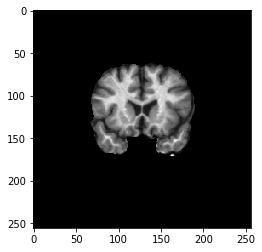

In [91]:
img = nib.load('/home/tony/Documents/IBSR_preprocessed_2d/IBSR_01/image_80.nii.gz').get_data().astype(np.float32)
label = nib.load('/home/tony/Documents/IBSR_preprocessed_2d/IBSR_01/label_80.nii.gz').get_data().astype(np.int64)

img = np.power(img, 2)
img = max_min_normalize(img)


img = np.expand_dims(img, axis=2)
img = np.concatenate((img, img, img), 2)
plt.imshow(img)
segments = slic(img.astype('double'), n_segments=1000, compactness=10)
print(segments.max())

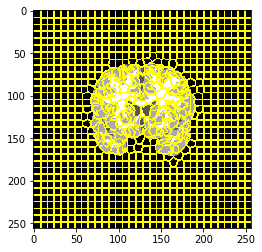

In [92]:
plt.imshow(mark_boundaries(max_min_normalize(label), segments))

179


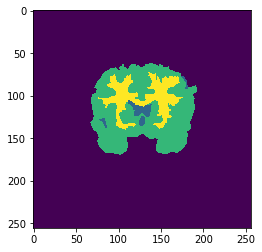

In [93]:
seg = np.zeros((segments.shape[0], segments.shape[1])).astype('int')
cnt = 1
for i in range(segments.max()+1):
    if label[np.where(segments==i)].sum()!=0:
        seg[np.where(segments==i)] = cnt
        cnt += 1

n_vertex = 500
n_class = 4

label_new = np.zeros((label.shape[0], label.shape[1]))
for i in range(seg.max()+1):
    label_new[np.where(seg==i)] = int(np.median(label[np.where(seg==i)]))
plt.imshow(label_new)
print(seg.max())

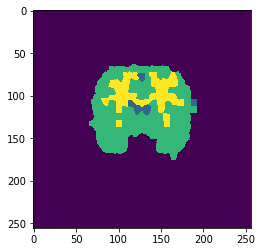

In [90]:
n_vertex = 2000
n_class = 4

label_new = np.zeros((label.shape[0], label.shape[1]))
for i in range(segments.max()+1):
    label_new[np.where(segments==i)] = int(np.median(label[np.where(segments==i)]))
plt.imshow(label_new)

In [ ]:
def feature_extract(img, segments, f_range=5, n_vertex=256, tao=0.1):
    step = math.floor(f_range/2)
    n_segments = np.max(segments) + 1
    centroid_list = []